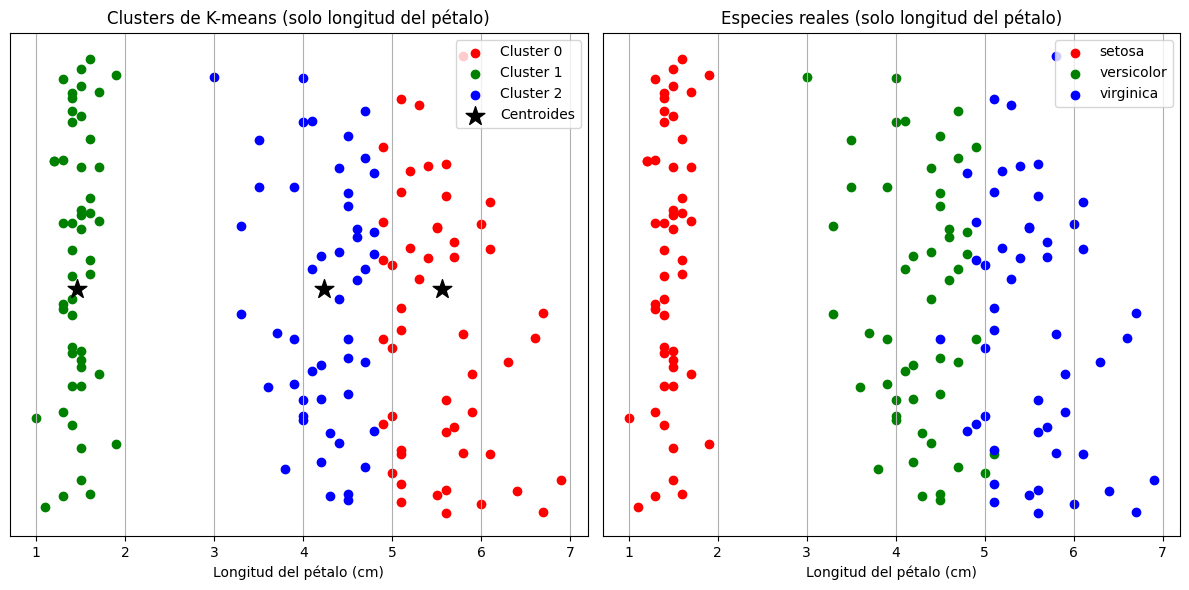

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 1. Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Crear un DataFrame con solo la longitud del pétalo
petal_length_df = pd.DataFrame(iris.data[:, 2], columns=['petal length (cm)'])

# 3. Realizar el clustering K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
petal_length_df['cluster'] = kmeans.fit_predict(petal_length_df[['petal length (cm)']])

# 4. Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# 5. Añadir las etiquetas de las especies reales para comparar
petal_length_df['true_species'] = [target_names[i] for i in y]

# 6. Crear un "jitter" para la visualización en 1D
jittered_y = np.random.rand(len(petal_length_df)) * 0.5

# 7. Graficar los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Clusters de K-means con centroides
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    ax1.scatter(
        petal_length_df.loc[petal_length_df['cluster'] == i, 'petal length (cm)'],
        jittered_y[petal_length_df['cluster'] == i],
        c=color,
        label=f'Cluster {i}'
    )
# Añadir los centroides
ax1.scatter(
    centroids,
    [0.25] * len(centroids), # Posición fija en y para los centroides
    marker='*',
    s=200, # Tamaño del marcador
    c='k', # Color negro
    label='Centroides'
)
ax1.set_title('Clusters de K-means (solo longitud del pétalo)')
ax1.set_xlabel('Longitud del pétalo (cm)')
ax1.set_yticks([])  # Eliminar los ticks del eje Y
ax1.legend()
ax1.grid(axis='x')

# Gráfico 2: Especies reales para comparar
for i, (name, color) in enumerate(zip(target_names, colors)):
    ax2.scatter(
        petal_length_df.loc[y == i, 'petal length (cm)'],
        jittered_y[y == i],
        c=color,
        label=name
    )
ax2.set_title('Especies reales (solo longitud del pétalo)')
ax2.set_xlabel('Longitud del pétalo (cm)')
ax2.set_yticks([])
ax2.legend()
ax2.grid(axis='x')

plt.tight_layout()
plt.show()